In [784]:
import pandas as pd
import numpy as np

beansData = pd.read_csv('data/beans.csv')
bananasData = pd.read_csv('data/bananas.csv')
orangesData = pd.read_csv('data/oranges.csv')
potatoChipsData = pd.read_csv('data/potatochips.csv')

covidData = pd.read_csv('data/covid.csv')

beansData['date'] = pd.to_datetime(beansData[['year', 'month']].assign(DAY=1))
bananasData['date'] = pd.to_datetime(bananasData[['year', 'month']].assign(DAY=1))
orangesData['date'] = pd.to_datetime(orangesData[['year', 'month']].assign(DAY=1))
potatoChipsData['date'] = pd.to_datetime(potatoChipsData[['year', 'month']].assign(DAY=1))

covidData['new_cases'] = covidData['cases'].diff()
covidData['new_deaths'] = covidData['deaths'].diff()


beansData

,item_name2,month,year,price,increase,date
0,"Beans, dried \r\nUnits: $ per LB",1,2020,1.432,0,2020-01-01
1,"Beans, dried \r\nUnits: $ per LB",2,2020,1.461,1,2020-02-01
2,"Beans, dried \r\nUnits: $ per LB",3,2020,1.488,1,2020-03-01
3,"Beans, dried \r\nUnits: $ per LB",6,2020,1.422,0,2020-06-01
4,"Beans, dried \r\nUnits: $ per LB",7,2020,1.415,0,2020-07-01
5,"Beans, dried \r\nUnits: $ per LB",8,2020,1.445,1,2020-08-01
6,"Beans, dried \r\nUnits: $ per LB",9,2020,1.424,0,2020-09-01
7,"Beans, dried \r\nUnits: $ per LB",10,2020,1.410,0,2020-10-01
8,"Beans, dried \r\nUnits: $ per LB",11,2020,1.391,0,2020-11-01
9,"Beans, dried \r\nUnits: $ per LB",12,2020,1.404,1,2020-12-01


In [785]:
covidData['date1'] = pd.to_datetime(covidData['date'])
covidData.set_index('date1', inplace=True)

monthlyCovid = covidData.resample('MS').sum()

monthlyCovid['date'] = monthlyCovid.index

<AxesSubplot:xlabel='date', ylabel='new_deaths'>

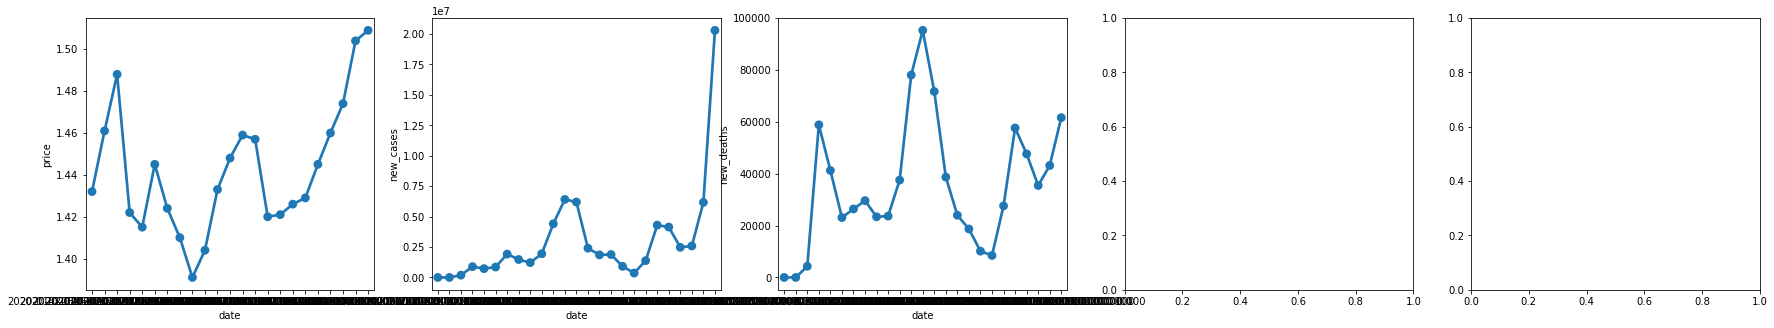

In [786]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))

sns.pointplot(x="date", y="price", data=beansData, ax=axs[0])
sns.pointplot(x="date", y="new_cases", data=monthlyCovid, ax=axs[1])
sns.pointplot(x="date", y="new_deaths", data=monthlyCovid, ax=axs[2])

In [787]:
combinedBeansData = pd.merge(monthlyCovid, beansData, on="date")

combinedBananasData = pd.merge(monthlyCovid, bananasData, on="date")

combinedOrangesData = pd.merge(monthlyCovid, orangesData, on="date")

combinedPotatoChipsData = pd.merge(monthlyCovid, potatoChipsData, on="date")

data = pd.concat([combinedBeansData, combinedBananasData, combinedOrangesData, combinedPotatoChipsData])

combinedPotatoChipsData

,cases,deaths,new_cases,new_deaths,date,item_name2,month,year,price,increase
0,4.100000e+01,0.0,6.0,0.0,2020-01-01,Potato chips \r\nUnits: $ per 16 oz,1,2020,4.494,0
1,7.360000e+02,1.0,63.0,1.0,2020-02-01,Potato chips \r\nUnits: $ per 16 oz,2,2020,4.594,1
2,1.095533e+06,20322.0,188391.0,4303.0,2020-03-01,Potato chips \r\nUnits: $ per 16 oz,3,2020,4.630,1
3,1.961170e+07,990495.0,887295.0,58836.0,2020-04-01,Potato chips \r\nUnits: $ per 16 oz,4,2020,4.880,1
4,4.545210e+07,2695260.0,723546.0,41239.0,2020-05-01,Potato chips \r\nUnits: $ per 16 oz,5,2020,4.985,1
5,6.528884e+07,3498954.0,854019.0,23083.0,2020-06-01,Potato chips \r\nUnits: $ per 16 oz,6,2020,5.087,1
6,1.116261e+08,4307836.0,1918348.0,26400.0,2020-07-01,Potato chips \r\nUnits: $ per 16 oz,7,2020,5.104,1
7,1.667588e+08,5259819.0,1473788.0,29610.0,2020-08-01,Potato chips \r\nUnits: $ per 16 oz,8,2020,5.070,0
8,1.997588e+08,5879775.0,1217278.0,23380.0,2020-09-01,Potato chips \r\nUnits: $ per 16 oz,9,2020,5.024,0
9,2.527941e+08,6774225.0,1946272.0,23660.0,2020-10-01,Potato chips \r\nUnits: $ per 16 oz,10,2020,5.039,1


In [788]:
data.corr().abs()[["price"]]

,price
cases,0.060101
deaths,0.057813
new_cases,0.030871
new_deaths,0.009224
month,0.013610
year,0.053077
price,1.000000
increase,0.021548
Unnamed: 5,NaN
Unnamed: 6,NaN


In [789]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['new_cases','new_deaths', 'year', 'month']], data.increase, test_size=0.15, random_state=0)

In [790]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [791]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.coef_

array([[-0.19835359,  0.47797733,  0.3406372 ,  0.25572261]])

In [792]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))
import tensorflow as tf
print(tf.test.gpu_device_name())

0.7272727272727273



In [793]:
x_train, x_test, y_train, y_test = train_test_split(data[['year', 'month']], data.increase, test_size=0.15, random_state=0)

In [794]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [795]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.coef_

array([[0.3860589 , 0.27039671]])

In [796]:
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))
import tensorflow as tf
print(tf.test.gpu_device_name())

0.6363636363636364



In [797]:
x_train, x_test, y_train, y_test = train_test_split(data[['new_cases','new_deaths']], data.increase, test_size=0.15, random_state=0)

In [798]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [799]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.coef_

array([[-0.05372524,  0.51955433]])

In [800]:
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))
import tensorflow as tf
print(tf.test.gpu_device_name())

0.5454545454545454

